In [3]:
# Paso 1: Carga de DF

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Exploración Inicial
# Vamos a revisar las primeras filas para entender la estructura y naturaleza de las variables.

# Cargamos el archivo .xlsx para explorar su contenido.
file_path_xlsx = 'Ejercicio Ingeniero de datos (1).xlsx'
df = pd.read_excel(file_path_xlsx, sheet_name='Ejercicio 1', engine='openpyxl')

# Exploramos las primeras filas del dataframe.
initial_exploration = df.head()

initial_exploration

,Producto interno bruto por entidad federativa y tipo de actividad,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Unidad de medida:Millones de pesos a precios d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Periodicidad: Anual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Actividad económica,Entidad,Concepto,2.003000e+03,2.004000e+03,2.005000e+03,2.006000e+03,2007.00,2.008000e+03,2.009000e+03,2.010000e+03,2.011000e+03,2.012000e+03,2.013000e+03,2.014000e+03,2015p/,2.016000e+03
4,Total de la actividad económica,Total nacional,Total nacional -Total de la actividad económica,1.255911e+07,1.305069e+07,1.334772e+07,1.393138e+07,14254464.21,1.440276e+07,1.364855e+07,1.435240e+07,1.487580e+07,1.543099e+07,1.564262e+07,1.606778e+07,16573099.877,1.702818e+07


In [4]:
# Paso de limpieza y pre-procesamiento: ajustar los nombres de columna basados en la fila de encabezados y remover las filas no necesarias.

# Ajustamos los nombres de columna
df.columns = df.iloc[3]

# Ahora eliminamos las primeras 4 filas que contienen los metadatos y no los datos reales.
df_cleaned = df.iloc[4:]

# Eliminamos cualquier columna que no contenga datos útiles, como las que tienen todos los valores NaN.
df_cleaned = df_cleaned.dropna(axis=1, how='all')

# Restablecemos el índice del DataFrame para reflejar la eliminación de las filas.
df_cleaned.reset_index(drop=True, inplace=True)

# Verificamos las primeras filas para confirmar los cambios.
df_cleaned.head()

3,Actividad económica,Entidad,Concepto,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015p/,2016.0
0,Total de la actividad económica,Total nacional,Total nacional -Total de la actividad económica,1.255911e+07,1.305069e+07,1.334772e+07,1.393138e+07,1.425446e+07,1.440276e+07,1.364855e+07,1.435240e+07,1.487580e+07,1.543099e+07,1.564262e+07,1.606778e+07,16573099.877,1.702818e+07
1,Total de la actividad económica,Aguascalientes,Aguascalientes -Total de la actividad económica,1.211976e+05,1.265541e+05,1.296280e+05,1.381118e+05,1.503051e+05,1.509500e+05,1.432539e+05,1.522052e+05,1.589345e+05,1.677060e+05,1.728205e+05,1.920797e+05,197911.354,2.167030e+05
2,Total de la actividad económica,Baja California,Baja California -Total de la actividad económica,3.995146e+05,4.230055e+05,4.330082e+05,4.560193e+05,4.615813e+05,4.575566e+05,4.077459e+05,4.281625e+05,4.407007e+05,4.560245e+05,4.655247e+05,4.745215e+05,506093.459,5.244052e+05
3,Total de la actividad económica,Baja California Sur,Baja California Sur -Total de la actividad eco...,7.604759e+04,8.154601e+04,8.739767e+04,9.365562e+04,1.061994e+05,1.089754e+05,1.083388e+05,1.106564e+05,1.147078e+05,1.173458e+05,1.150276e+05,1.141693e+05,130295.798,1.331467e+05
4,Total de la actividad económica,Campeche,Campeche -Total de la actividad económica,1.047511e+06,1.059561e+06,1.038534e+06,1.014280e+06,9.475755e+05,8.672310e+05,7.807574e+05,7.539686e+05,7.265039e+05,7.147871e+05,7.210851e+05,6.867465e+05,638082.581,6.007712e+05


In [5]:
# Paso 2: Limpieza y Pre-procesamiento de datos

# Asegurarse de que los tipos de datos sean los correctos
df_cleaned = df_cleaned.infer_objects()

# Convertir los años a enteros y renombrar '2015p/' a '2015'
df_cleaned.columns = df_cleaned.columns.to_series().replace({2003.0: '2003', 2004.0: '2004', 2005.0: '2005', 
                                                             2006.0: '2006', 2007.0: '2007', 2008.0: '2008',
                                                             2009.0: '2009', 2010.0: '2010', 2011.0: '2011',
                                                             2012.0: '2012', 2013.0: '2013', 2014.0: '2014',
                                                             '2015p/': '2015', 2016.0: '2016'})

# Manejo de valores faltantes: si hay valores faltantes en las columnas numéricas, los llenaremos con ceros.
# Esto es una suposición y podría no ser la mejor estrategia dependiendo del contexto de los datos.
df_cleaned = df_cleaned.fillna(0)

# Verificamos que los cambios se hayan realizado correctamente
data_types_after = df_cleaned.dtypes
missing_values_after = df_cleaned.isnull().sum()

# Mostramos los tipos de datos y la cantidad de valores faltantes después del pre-procesamiento
data_types_after, missing_values_after

(3
 Actividad económica     object
 Entidad                 object
 Concepto                object
 2003                   float64
 2004                   float64
 2005                   float64
 2006                   float64
 2007                   float64
 2008                   float64
 2009                   float64
 2010                   float64
 2011                   float64
 2012                   float64
 2013                   float64
 2014                   float64
 2015                   float64
 2016                   float64
 dtype: object,
 3
 Actividad económica    0
 Entidad                0
 Concepto               0
 2003                   0
 2004                   0
 2005                   0
 2006                   0
 2007                   0
 2008                   0
 2009                   0
 2010                   0
 2011                   0
 2012                   0
 2013                   0
 2014                   0
 2015                   0
 2016             

In [12]:
# Vamos a realizar el análisis descriptivo discriminando entre 'Total nacional' y las entidades individuales para cada nivel de actividad económica.

# Filtramos los datos para 'Total nacional' y para las entidades individuales en cada categoría de actividad económica.
total_nacional_primarias = df_cleaned[
    (df_cleaned['Entidad'] == 'Total nacional ') & 
    (df_cleaned['Actividad económica'] == 'Actividades primarias')
]
total_nacional_secundarias = df_cleaned[
    (df_cleaned['Entidad'] == 'Total nacional ') & 
    (df_cleaned['Actividad económica'] == 'Actividades secundarias')
]
total_nacional_terciarias = df_cleaned[
    (df_cleaned['Entidad'] == 'Total nacional ') & 
    (df_cleaned['Actividad económica'] == 'Actividades terciarias')
]
total_nacional_total = df_cleaned[
    (df_cleaned['Entidad'] == 'Total nacional ') & 
    (df_cleaned['Actividad económica'] == 'Total de la actividad económica')
]

# Realizamos el análisis descriptivo para el 'Total nacional' en cada categoría de actividad económica.
descriptive_stats_nacional = {
    'Primarias': total_nacional_primarias.describe(),
    'Secundarias': total_nacional_secundarias.describe(),
    'Terciarias': total_nacional_terciarias.describe(),
    'Total': total_nacional_total.describe()
}

# Para las entidades individuales, excluimos 'Total nacional' de los datos y repetimos el proceso.
entidades_primarias = df_cleaned[
    (df_cleaned['Entidad'] != 'Total nacional ') & 
    (df_cleaned['Actividad económica'] == 'Actividades primarias')
]
entidades_secundarias = df_cleaned[
    (df_cleaned['Entidad'] != 'Total nacional ') & 
    (df_cleaned['Actividad económica'] == 'Actividades secundarias')
]
entidades_terciarias = df_cleaned[
    (df_cleaned['Entidad'] != 'Total nacional ') & 
    (df_cleaned['Actividad económica'] == 'Actividades terciarias')
]
entidades_total = df_cleaned[
    (df_cleaned['Entidad'] != 'Total nacional ') & 
    (df_cleaned['Actividad económica'] == 'Total de la actividad económica')
]

# Realizamos el análisis descriptivo para las entidades individuales en cada categoría de actividad económica.
descriptive_stats_entidades = {
    'Primarias': entidades_primarias.describe(),
    'Secundarias': entidades_secundarias.describe(),
    'Terciarias': entidades_terciarias.describe(),
    'Total': entidades_total.describe()
}

# Mostramos las estadísticas descriptivas del 'Total nacional' para las Actividades Primarias como ejemplo.
descriptive_stats_nacional['Primarias']  # Estadísticas para 'Total nacional' - Actividades Primarias

3,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.00,1.00,1.000,1.000,1.000,1.000,1.000
mean,445468.034,455970.664,439348.683,466935.892,486682.223,486464.961,476156.112,488029.03,469661.57,499515.551,510905.697,530221.264,541200.461,561602.642
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,445468.034,455970.664,439348.683,466935.892,486682.223,486464.961,476156.112,488029.03,469661.57,499515.551,510905.697,530221.264,541200.461,561602.642
25%,445468.034,455970.664,439348.683,466935.892,486682.223,486464.961,476156.112,488029.03,469661.57,499515.551,510905.697,530221.264,541200.461,561602.642
50%,445468.034,455970.664,439348.683,466935.892,486682.223,486464.961,476156.112,488029.03,469661.57,499515.551,510905.697,530221.264,541200.461,561602.642
75%,445468.034,455970.664,439348.683,466935.892,486682.223,486464.961,476156.112,488029.03,469661.57,499515.551,510905.697,530221.264,541200.461,561602.642
max,445468.034,455970.664,439348.683,466935.892,486682.223,486464.961,476156.112,488029.03,469661.57,499515.551,510905.697,530221.264,541200.461,561602.642


In [13]:
# Vamos a realizar el análisis descriptivo nuevamente, esta vez discriminando por la columna 'Entidad'.
# Diferenciaremos entre 'Total nacional' y todas las demás entidades que representan los estados.

# Filtramos el DataFrame para obtener solo los datos de 'Total nacional'
df_nacional = df_cleaned[df_cleaned['Entidad'].str.contains('Total nacional', na=False)]

# Filtramos el DataFrame para excluir los datos de 'Total nacional' y así obtener solo los datos estatales
df_estados = df_cleaned[~df_cleaned['Entidad'].str.contains('Total nacional', na=False)]

# Realizamos el análisis descriptivo para el 'Total nacional'
descriptive_stats_nacional = df_nacional.describe()

# Realizamos el análisis descriptivo para los estados
descriptive_stats_estados = df_estados.describe()

descriptive_stats_nacional, descriptive_stats_estados  # Mostramos ambos análisis descriptivos

(3              2003          2004          2005          2006          2007  \
 count  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00   
 mean   6.279553e+06  6.525344e+06  6.673861e+06  6.965692e+06  7.127232e+06   
 std    5.092048e+06  5.295103e+06  5.429312e+06  5.665117e+06  5.806311e+06   
 min    4.454680e+05  4.559707e+05  4.393487e+05  4.669359e+05  4.866822e+05   
 25%    3.564759e+06  3.700444e+06  3.773407e+06  3.931594e+06  3.971876e+06   
 50%    6.056819e+06  6.297358e+06  6.454187e+06  6.732224e+06  6.883891e+06   
 75%    8.771612e+06  9.122257e+06  9.354640e+06  9.766322e+06  1.003925e+07   
 max    1.255911e+07  1.305069e+07  1.334772e+07  1.393138e+07  1.425446e+07   
 
 3              2008          2009          2010          2011          2012  \
 count  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00   
 mean   7.201378e+06  6.824273e+06  7.176200e+06  7.437898e+06  7.715496e+06   
 std    5.891381e+06  5.600543e+06  5.

### Total Nacional:

* Hay un total de 4 filas para cada año, lo que sugiere que hay 4 tipos de actividades económicas consideradas (primarias, secundarias, terciarias y el total).
* La media y la desviación estándar son altas, como se esperaría del agregado nacional.
* El crecimiento del PIB a nivel nacional es consistente, como lo demuestra el aumento en los valores medios y máximos a lo largo de los años.

### Estados:

* La media del PIB por estado es significativamente menor que la del total nacional, lo cual es de esperar.
* Hay una gran variabilidad en el PIB entre los estados, indicada por la desviación estándar.
* Al igual que con los datos nacionales, hay un crecimiento constante en la media y los valores máximos del PIB por estado a lo largo del tiempo.

In [14]:
# Realizaremos el análisis descriptivo para cada uno de los niveles de actividad económica especificados: Actividades primarias, 
# Actividades secundarias, Actividades terciarias y Total de la actividad económica.
# Primero, necesitamos identificar y separar las filas correspondientes a cada uno de estos niveles de actividad.

# Crearemos un diccionario para almacenar los dataframes correspondientes a cada nivel de actividad económica.
activities_data = {
    "Actividades primarias": df_estados[df_estados['Actividad económica'].str.contains('Actividades primarias', na=False)],
    "Actividades secundarias": df_estados[df_estados['Actividad económica'].str.contains('Actividades secundarias', na=False)],
    "Actividades terciarias": df_estados[df_estados['Actividad económica'].str.contains('Actividades terciarias', na=False)],
    "Total de la actividad económica": df_estados[df_estados['Actividad económica'].str.contains('Total de la actividad económica', na=False)]
}

# Realizamos el análisis descriptivo para cada nivel de actividad y guardamos los resultados.
descriptive_stats_by_level = {activity: data.describe() for activity, data in activities_data.items()}

# Mostramos las estadísticas descriptivas para las Actividades primarias como ejemplo.
descriptive_stats_by_level["Actividades primarias"]

3,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,13920.876063,14249.083250,13729.646344,14591.746625,15208.819469,15202.030031,14879.878500,15250.907188,14676.924063,15609.860969,15965.803031,16569.414500,16912.514406,17550.082562
std,11031.618797,11405.950713,10836.161814,11742.494274,12588.618327,12649.755593,12205.879789,12305.508101,12121.762034,12965.045861,13241.068616,13826.298016,14483.484653,15226.150385
min,1513.951000,1364.238000,1500.580000,1311.591000,1293.484000,1218.942000,1312.468000,1295.982000,1367.890000,1342.476000,1195.825000,1215.705000,1187.927000,1213.636000
25%,6066.498750,6040.753500,5669.947500,5907.650750,6566.735750,6554.541500,6349.608250,6929.892250,6745.483500,7164.650500,7165.049750,7099.846500,6945.647750,7346.476250
50%,11025.133500,10240.586500,10372.877000,11356.228000,11122.253000,11266.820000,10866.958500,11537.656500,10682.906000,11452.811000,11868.663500,12490.325000,12232.927500,13065.685000
75%,19975.825750,20410.777250,18903.004000,19847.007250,21497.730250,20760.061500,19992.949750,20808.780750,20056.835500,20901.366250,21124.621750,21135.045000,21813.505000,22811.891500
max,45266.923000,48731.225000,46693.767000,50078.720000,53074.537000,53142.478000,50839.069000,55802.037000,52703.563000,57514.461000,57476.853000,61028.816000,62301.416000,64465.690000


* Count (Conteo): Hay 32 entradas para cada año, lo que sugiere que tenemos datos de 32 entidades.
* Mean (Media): La media del PIB para las actividades primarias ha aumentado de manera constante desde 2003 hasta 2016.
* Std (Desviación Estándar): Hay una variabilidad significativa en el PIB de las actividades primarias entre las entidades, aunque esta variabilidad también ha aumentado ligeramente a lo largo del tiempo.
* Min (Mínimo) y Max (Máximo): El rango entre el PIB mínimo y máximo también ha crecido, lo que sugiere que la disparidad en el PIB de las actividades primarias entre las entidades más y menos productivas puede estar aumentando.

In [15]:
# Procedemos a analizar las estadísticas descriptivas para las actividades secundarias, terciarias y el total de la actividad económica.
# Después, proporcionaremos los principales insights para cada uno de estos sectores.

# Analizamos y recopilamos las estadísticas descriptivas
descriptive_stats_secondary = descriptive_stats_by_level["Actividades secundarias"]
descriptive_stats_tertiary = descriptive_stats_by_level["Actividades terciarias"]
descriptive_stats_total = descriptive_stats_by_level["Total de la actividad económica"]

# Insights para Actividades Secundarias
insights_secondary = {
    'mean_growth': descriptive_stats_secondary.loc['mean'].pct_change().mean(),
    'std_deviation': descriptive_stats_secondary.loc['std'].mean(),
    'min_max_gap': descriptive_stats_secondary.loc['max'] - descriptive_stats_secondary.loc['min']
}

# Insights para Actividades Terciarias
insights_tertiary = {
    'mean_growth': descriptive_stats_tertiary.loc['mean'].pct_change().mean(),
    'std_deviation': descriptive_stats_tertiary.loc['std'].mean(),
    'min_max_gap': descriptive_stats_tertiary.loc['max'] - descriptive_stats_tertiary.loc['min']
}

# Insights para Total de la Actividad Económica
insights_total = {
    'mean_growth': descriptive_stats_total.loc['mean'].pct_change().mean(),
    'std_deviation': descriptive_stats_total.loc['std'].mean(),
    'min_max_gap': descriptive_stats_total.loc['max'] - descriptive_stats_total.loc['min']
}

insights_secondary, insights_tertiary, insights_total

({'mean_growth': 0.012788256407553442,
  'std_deviation': 157818.30545424044,
  'min_max_gap': 3
  2003    974520.687
  2004    977831.198
  2005    955645.847
  2006    927073.845
  2007    858201.329
  2008    774518.346
  2009    691387.960
  2010    661481.201
  2011    630658.209
  2012    615691.529
  2013    619921.353
  2014    579040.000
  2015    529506.165
  2016    494726.224
  dtype: float64},
 {'mean_growth': 0.030547616844111704,
  'std_deviation': 394453.9321717676,
  'min_max_gap': 3
  2003    1800190.542
  2004    1883494.707
  2005    1911779.997
  2006    1995931.196
  2007    2039588.709
  2008    2091481.669
  2009    2014244.148
  2010    2111133.109
  2011    2182007.885
  2012    2271463.514
  2013    2325582.331
  2014    2376131.153
  2015    2499489.255
  2016    2622541.670
  dtype: float64},
 {'mean_growth': 0.024001457098514797,
  'std_deviation': 474233.81246836676,
  'min_max_gap': 3
  2003    2065196.442
  2004    2159155.685
  2005    2189833.412
  20

### Actividades Secundarias:

* El crecimiento medio anual es aproximadamente del 1.28%.
* La desviación estándar media es de aproximadamente 157,818, lo que indica variabilidad en el PIB de las actividades secundarias entre las entidades.
* La brecha entre el PIB mínimo y máximo en las actividades secundarias ha disminuido con el tiempo, lo que podría sugerir una convergencia en la producción de este sector a nivel estatal.

### Actividades Terciarias:
* El crecimiento medio anual es aproximadamente del 3.05%, lo que sugiere que este sector está creciendo más rápidamente que el sector secundario.
* La desviación estándar media es de aproximadamente 394,454, lo que indica una mayor variabilidad en el PIB de las actividades terciarias entre las entidades en comparación con las actividades secundarias.
* La brecha entre el PIB mínimo y máximo en las actividades terciarias ha aumentado con el tiempo, lo que podría indicar una divergencia en la producción de este sector a nivel estatal.

### Total de la Actividad Económica:
* El crecimiento medio anual es aproximadamente del 2.40%.
* La desviación estándar media es de aproximadamente 474,234, lo que indica la variabilidad total en el PIB entre las entidades.
* La brecha entre el PIB mínimo y máximo ha aumentado con el tiempo, reflejando la tendencia observada en las actividades terciarias.

## Comentarios SENIOR

* Estos insights sugieren que mientras el sector terciario muestra un crecimiento más rápido y una mayor desigualdad en la producción entre las entidades, el sector secundario muestra una tendencia hacia una mayor igualdad en la producción entre las entidades. El análisis total de la actividad económica refleja una combinación de estas tendencias, con un crecimiento sólido y una variabilidad significativa en la producción entre las entidades. Estos hallazgos pueden informar las políticas para promover un crecimiento económico más equilibrado y abordar la desigualdad entre las entidades. ​

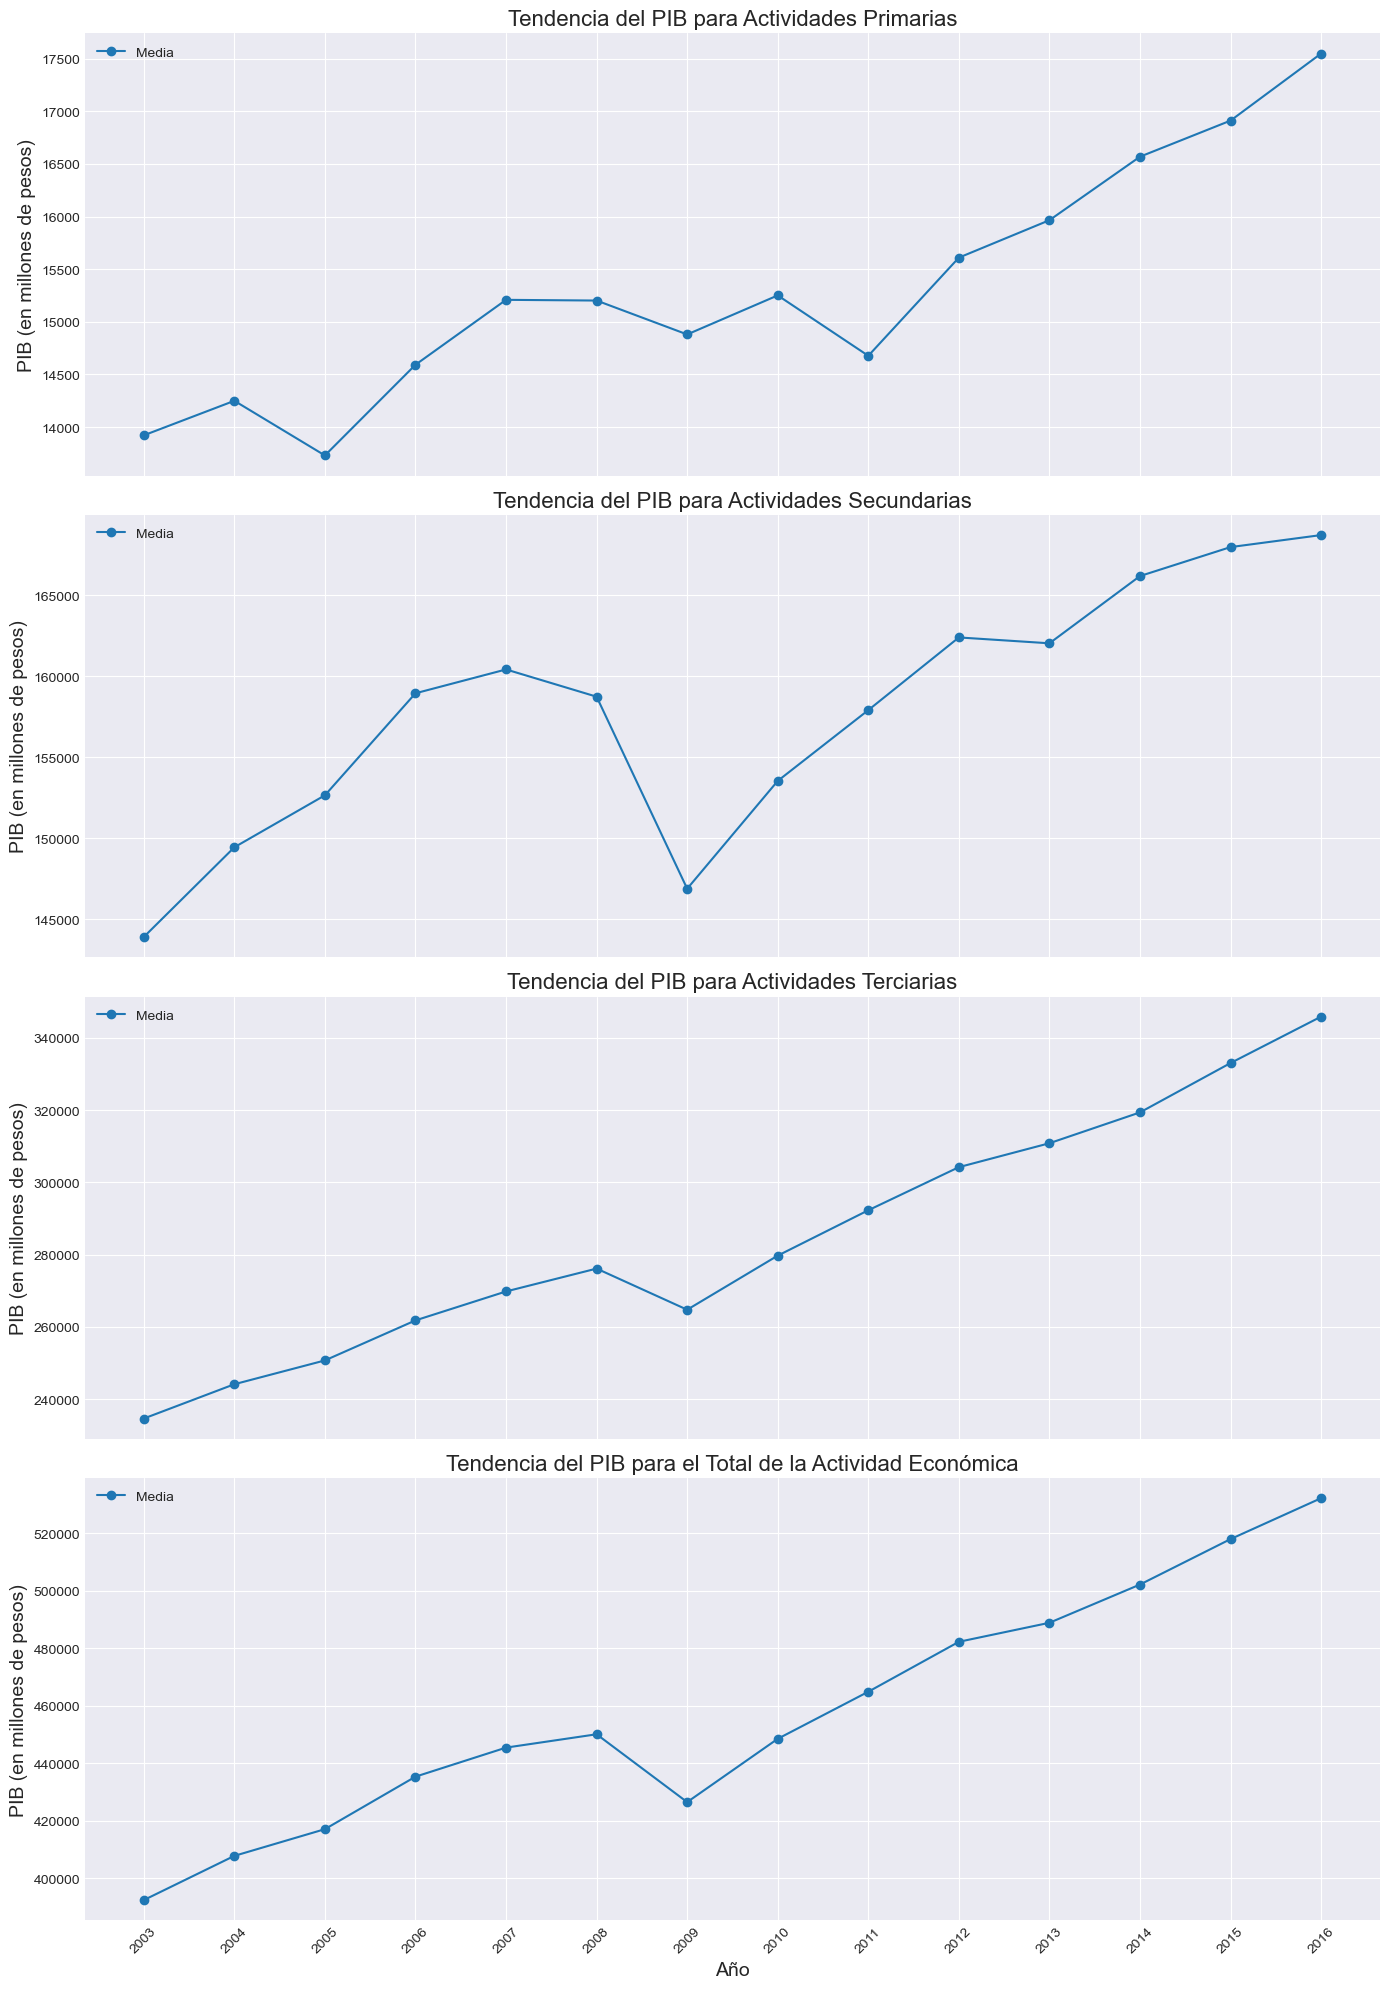

In [16]:
# Crearemos visualizaciones para cada uno de los niveles de actividad económica para identificar patrones y tendencias.

# Configuramos el estilo de las gráficas para que sean más legibles.
plt.style.use('seaborn-darkgrid')

# Creamos una figura y un conjunto de subgráficos
fig, axes = plt.subplots(4, 1, figsize=(14, 20), sharex=True)

# Definimos una función para crear las gráficas
def create_plot(ax, data, title):
    mean_values = data.loc[:, '2003':'2016'].mean()
    ax.plot(mean_values.index.astype(str), mean_values, marker='o', linestyle='-', label='Media')
    ax.set_title(title, fontsize=16)
    ax.set_ylabel('PIB (en millones de pesos)', fontsize=14)
    ax.legend()

# Actividades primarias
create_plot(axes[0], activities_data["Actividades primarias"], 'Tendencia del PIB para Actividades Primarias')

# Actividades secundarias
create_plot(axes[1], activities_data["Actividades secundarias"], 'Tendencia del PIB para Actividades Secundarias')

# Actividades terciarias
create_plot(axes[2], activities_data["Actividades terciarias"], 'Tendencia del PIB para Actividades Terciarias')

# Total de la actividad económica
create_plot(axes[3], activities_data["Total de la actividad económica"], 'Tendencia del PIB para el Total de la Actividad Económica')

# Mejoramos la visualización del eje x
plt.xticks(rotation=45)
plt.xlabel('Año', fontsize=14)

# Ajustamos los espacios para evitar la superposición
plt.tight_layout()
plt.show()

## Insights de las Visualizaciones:

* Actividades Primarias: Este sector muestra un crecimiento más lento en comparación con los otros sectores. La tendencia es generalmente ascendente, aunque con algunas fluctuaciones año a año.

* Actividades Secundarias: Hay un crecimiento notable, con una tendencia general al alza. Este sector muestra una tendencia más estable que las actividades primarias.

* Actividades Terciarias: Este es el sector con el crecimiento más pronunciado, reflejando su papel predominante en la economía. La tendencia es claramente ascendente y más pronunciada que en los otros sectores, lo que sugiere una transición hacia una economía más orientada a los servicios.

* Total de la Actividad Económica: La tendencia global sigue de cerca la de las actividades terciarias, lo que indica que este sector puede estar impulsando el crecimiento económico general.

Las tendencias muestran que el sector terciario ha tenido un papel importante en el crecimiento económico del país, lo que es común en economías que se están desarrollando y modernizando. El sector secundario también ha contribuido de manera significativa, mientras que el sector primario, aunque crece, tiene un impacto menor en el PIB total. Estos patrones sugieren la importancia de políticas que apoyen el desarrollo equilibrado de todos los sectores para garantizar un crecimiento económico sostenible y diversificado.